In [1]:
import pandas as pd

In [2]:
df1= pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2=pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3=pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")

In [3]:
df = pd.concat([df1,df2,df3],ignore_index=False)

In [4]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
6024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
6025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
6026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
6027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


In [5]:
df.to_csv("Enrolment_combined.csv", index=False)

In [5]:
df['state'] = (
    df['state']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace('&', 'and')
    .str.replace(r'\s+', ' ', regex=True)
)


In [6]:
state_map = {
    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',

    # Andaman & Nicobar
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Dadra & Nagar Haveli and Daman & Diu (merged UT)
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman & diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu':'Dadra and Nagar Haveli and Daman and Diu',
     'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu':'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu':'Dadra and Nagar Haveli and Daman and Diu',

    

    # Odisha (old name)
    'orissa': 'Odisha',

    # Capital formatting fixes
    'jammu and kashmir ': 'Jammu and Kashmir',

    # west bengal
     'west bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',

    # Pondicherry
    'Puducherry':'Pondicherry'
}
df['state_cleaned'] = df['state'].replace(state_map)
df = df[~df['state_cleaned'].str.isnumeric()]
df['state'] = df['state_cleaned'].str.title()



C:\Users\HP\AppData\Local\Temp\ipykernel_23288\105239852.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state_cleaned'].str.title()


In [22]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu And Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Dadra And Nagar Haveli And Daman And Diu', 'Ladakh',
       'Andaman And Nicobar Islands', 'Pondicherry', 'Puducherry',
       'Lakshadweep'], dtype=object)

In [8]:
df.shape

(1006007, 8)

In [23]:
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banas Kantha', 'Tinsukia', 'Spsr Nellore',
       'Barpeta', 'Sonitpur', 'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram',
       'Patna', 'Lakhimpur', 'Bongaigaon', 'Vadodara', 'Nainital',
       'Dehradun', 'Hojai', 'Dohad', 'Morbi', 'Raipur', 'Gorakhpur',
       'Bulandshahr', 'Mathura', 'Pashchim Champaran', 'Bijapur',
       'Deoghar', 'Muzaf

# Feature Extraction

In [9]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


# Create time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

# Total enrolments
df['total_enrolment'] = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_23288\3479300642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
C:\Users\HP\AppData\Local\Temp\ipykernel_23288\3479300642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_23288\3479300642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

# 1. Temporal Analysis (Time-based)

## 1.1 Month-wise Seasonality

In [10]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df['month'] = pd.Categorical(
    df['month'],
    categories=month_order,
    ordered=True
)

monthly_trend = (
    df.groupby('month',observed=False)['total_enrolment']
      .sum()
      .reset_index()
      .sort_values('month')
)

print(monthly_trend)

        month  total_enrolment
0     January                0
1    February                0
2       March            16582
3       April           257438
4         May           183616
5        June           215734
6        July           616868
7      August                0
8   September          1475867
9     October           817919
10   November          1091996
11   December           759464


C:\Users\HP\AppData\Local\Temp\ipykernel_23288\2864517034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.Categorical(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

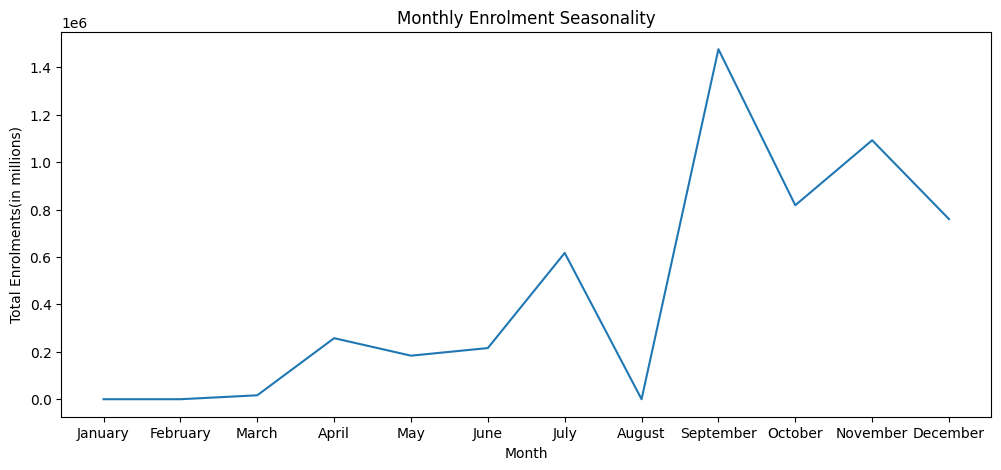

In [11]:
plt.figure(figsize=(12,5))
plt.plot(monthly_trend['month'], monthly_trend['total_enrolment'])
plt.xlabel("Month")
plt.ylabel("Total Enrolments(in millions)")
plt.title("Monthly Enrolment Seasonality")
plt.show()


## 1.2 Age-wise Trend Over Time

           age_0_5  age_5_17  age_18_greater
month                                       
January          0         0               0
February         0         0               0
March         5367      7407            3808
April       141154     91371           24913
May          95342     71690           16584
June         98943     99911           16880
July        318352    263333           35183
August           0         0               0
September   995612    465401           14854
October     562856    238957           16106
November    769156    297658           25182
December    560183    184655           14626


<Figure size 1200x600 with 0 Axes>

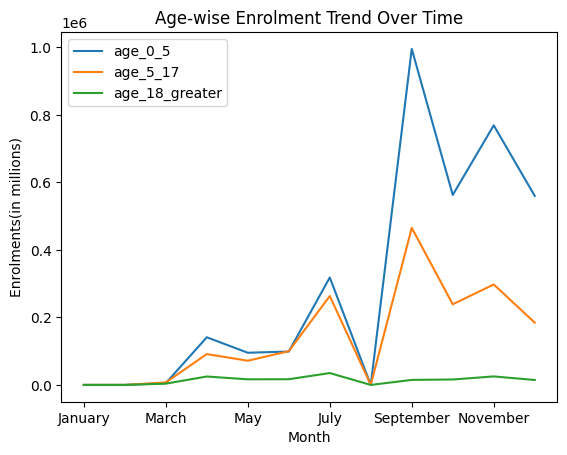

In [24]:
age_trend = df.groupby('month',observed=False)[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
print(age_trend)

plt.figure(figsize=(12,6))
age_trend.plot()
plt.xlabel("Month")
plt.ylabel("Enrolments(in millions)")
plt.title("Age-wise Enrolment Trend Over Time")
plt.show()


# 2. Geographic Analysis

## 2.1 State-wise Enrollment

state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375340
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
Name: total_enrolment, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

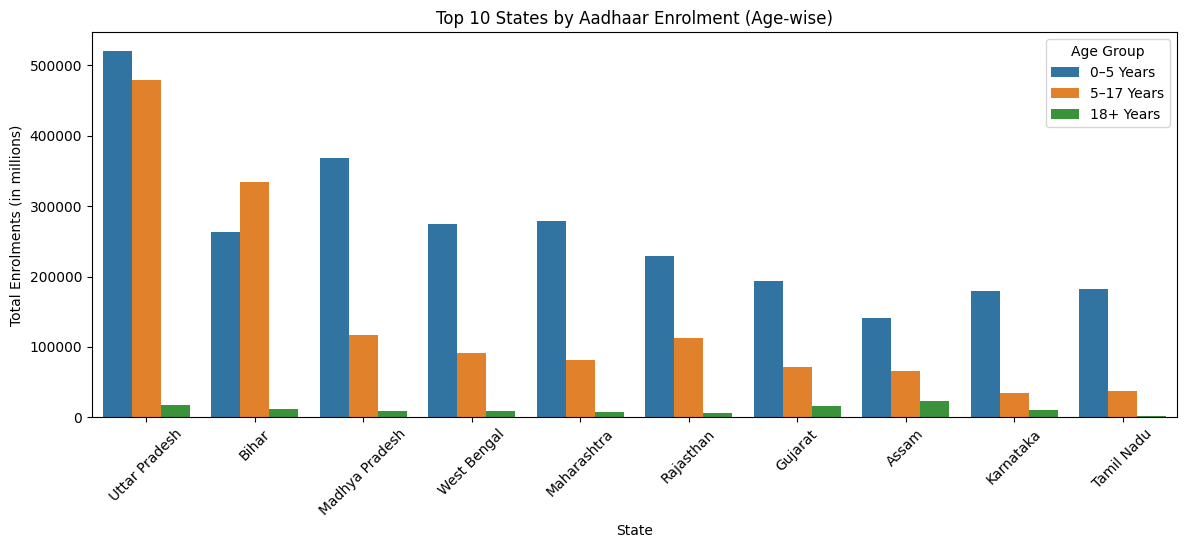

In [13]:
#  Get top 10 states by total enrolment 
top_states = (
    df.groupby('state')['total_enrolment']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print(top_states)

# Preserve the correct order
state_order = top_states.index.tolist()

#  Filter data
df_top = df[df['state'].isin(state_order)]

#  Aggregate age groups
age_state = (
    df_top.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .reset_index()
)

#  Convert to long format
age_state_melted = age_state.melt(
    id_vars='state',
    value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
    var_name='age_group',
    value_name='enrolment'
)

#  Clean age group labels
age_state_melted['age_group'] = age_state_melted['age_group'].map({
    'age_0_5': '0–5 Years',
    'age_5_17': '5–17 Years',
    'age_18_greater': '18+ Years'
})

# IMPORTANT: enforce sorted state order
age_state_melted['state'] = pd.Categorical(
    age_state_melted['state'],
    categories=state_order,
    ordered=True
)

#  Plot
plt.figure(figsize=(14,5))

sns.barplot(
    data=age_state_melted,
    x='state',
    y='enrolment',
    hue='age_group'
)

plt.xlabel("State")
plt.ylabel("Total Enrolments (in millions)")
plt.title("Top 10 States by Aadhaar Enrolment (Age-wise)")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


## 2.2 District-wise Disparities (Top Districts)

state          district         
Maharashtra    Thane                43688
Bihar          Sitamarhi            42232
Uttar Pradesh  Bahraich             39338
West Bengal    Murshidabad          35911
               South 24 Parganas    33540
Maharashtra    Pune                 31763
Rajasthan      Jaipur               31146
Karnataka      Bengaluru            30980
Uttar Pradesh  Sitapur              30854
Bihar          West Champaran       30438
Name: total_enrolment, dtype: int64


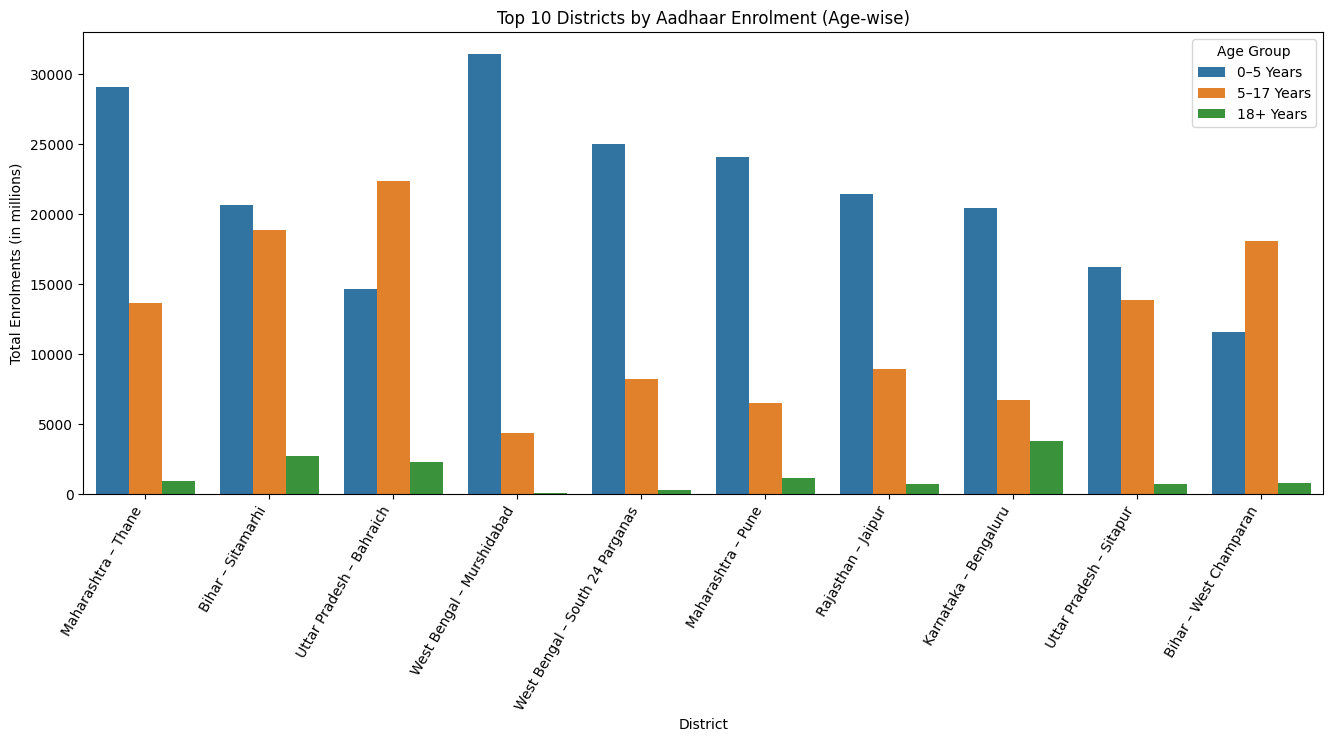

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Get top 10 districts by total enrolment
top_districts = (
    df.groupby(['state', 'district'])['total_enrolment']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print(top_districts)

# Preserve correct order
district_order = [
    f"{s} – {d}" for s, d in top_districts.index
]

#  Filter data to only top districts
df_top = df.merge(
    top_districts.reset_index()[['state', 'district']],
    on=['state', 'district'],
    how='inner'
)

#  Aggregate age groups
district_age = (
    df_top.groupby(['state', 'district'])[
        ['age_0_5', 'age_5_17', 'age_18_greater']
    ]
    .sum()
    .reset_index()
)

#  Convert to long format
district_age_melted = district_age.melt(
    id_vars=['state', 'district'],
    value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
    var_name='age_group',
    value_name='enrolment'
)

#  Clean age group labels
district_age_melted['age_group'] = district_age_melted['age_group'].map({
    'age_0_5': '0–5 Years',
    'age_5_17': '5–17 Years',
    'age_18_greater': '18+ Years'
})

#  Create ordered district label
district_age_melted['state_district'] = (
    district_age_melted['state'] + ' – ' + district_age_melted['district']
)

district_age_melted['state_district'] = pd.Categorical(
    district_age_melted['state_district'],
    categories=district_order,
    ordered=True
)

#  Plot
plt.figure(figsize=(16,6))

sns.barplot(
    data=district_age_melted,
    x='state_district',
    y='enrolment',
    hue='age_group'
)

plt.xlabel("District")
plt.ylabel("Total Enrolments (in millions)")
plt.title("Top 10 Districts by Aadhaar Enrolment (Age-wise)")
plt.xticks(rotation=60, ha='right')
plt.legend(title="Age Group")
plt.show()


# 3. Age-wise Demographic Analysis

## 3.1 Overall Age Group Contribution

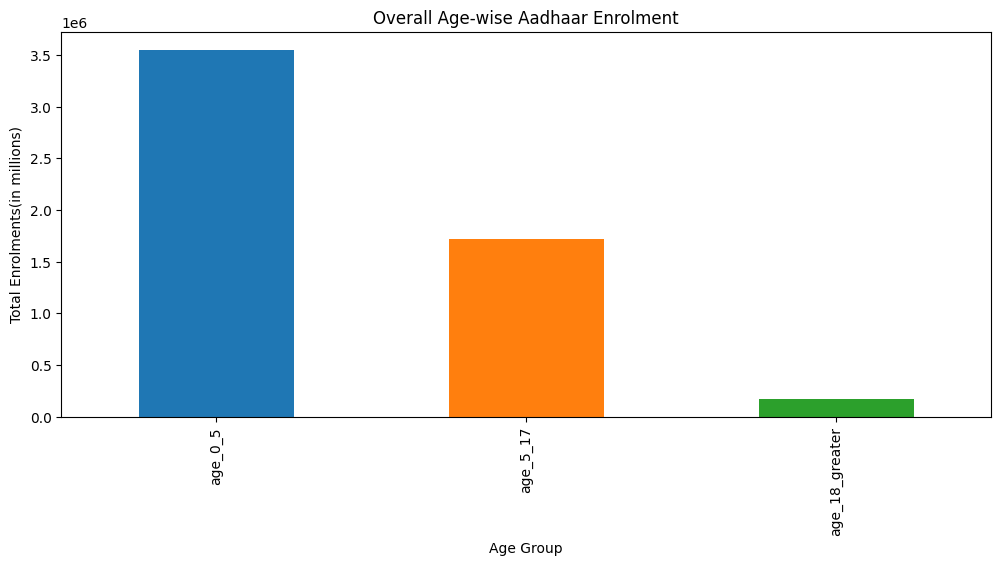

In [15]:
age_totals = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()


age_totals.plot(
    kind='bar',
    figsize=(12,5),
    color=plt.cm.tab10.colors
)
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments(in millions)")
plt.title("Overall Age-wise Aadhaar Enrolment")
plt.show()


## 3.2 State-wise Age Composition

In [16]:
state_age = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

state_age_ratio = state_age.div(state_age.sum(axis=1), axis=0)

state_age_ratio


,age_0_5,age_5_17,age_18_greater
state,,,
Andaman And Nicobar Islands,0.937378,0.062622,0.000000
Andhra Pradesh,0.880637,0.107655,0.011708
Arunachal Pradesh,0.450506,0.514733,0.034761
Assam,0.613540,0.287080,0.099380
Bihar,0.431236,0.549229,0.019535
Chandigarh,0.909291,0.077488,0.013221
Chhattisgarh,0.798816,0.181837,0.019347
Dadra And Nagar Haveli And Daman And Diu,0.876270,0.100646,0.023084
Delhi,0.731871,0.235864,0.032265


## 3.3 Identify Late Adult Enrollment States

In [17]:
adult_heavy_states = state_age_ratio.sort_values('age_18_greater', ascending=False)

adult_heavy_states.head(10)    # Wrt its own population


,age_0_5,age_5_17,age_18_greater
state,,,
Meghalaya,0.192938,0.485602,0.321460
Assam,0.613540,0.287080,0.099380
Mizoram,0.697941,0.218529,0.083530
Nagaland,0.289472,0.638545,0.071983
Goa,0.821260,0.108873,0.069867
Gujarat,0.688047,0.253724,0.058229
Sikkim,0.477571,0.474400,0.048029
Karnataka,0.803019,0.151692,0.045289
Punjab,0.797748,0.160920,0.041331


# 4. Coverage & Anomaly Analysis

## 4.1 Enrolment Maturity Indicator

In [18]:
df['child_ratio'] = (df['age_0_5'] + df['age_5_17']) / df['total_enrolment']
df['adult_ratio'] = df['age_18_greater'] / df['total_enrolment']

state_maturity = df.groupby('state')[['child_ratio', 'adult_ratio']].mean()

print(state_maturity.head())

## High child_ratio → mature enrolment
##High adult_ratio → late registration / coverage gaps

                             child_ratio  adult_ratio
state                                                
Andaman And Nicobar Islands     1.000000     0.000000
Andhra Pradesh                  0.990400     0.009600
Arunachal Pradesh               0.979069     0.020931
Assam                           0.947697     0.052303
Bihar                           0.987702     0.012298


C:\Users\HP\AppData\Local\Temp\ipykernel_23288\215473077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['child_ratio'] = (df['age_0_5'] + df['age_5_17']) / df['total_enrolment']
C:\Users\HP\AppData\Local\Temp\ipykernel_23288\215473077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adult_ratio'] = df['age_18_greater'] / df['total_enrolment']


        state  adult_ratio
22  Meghalaya     0.272437
24   Nagaland     0.083563
9         Goa     0.073174
3       Assam     0.052303
23    Mizoram     0.050234


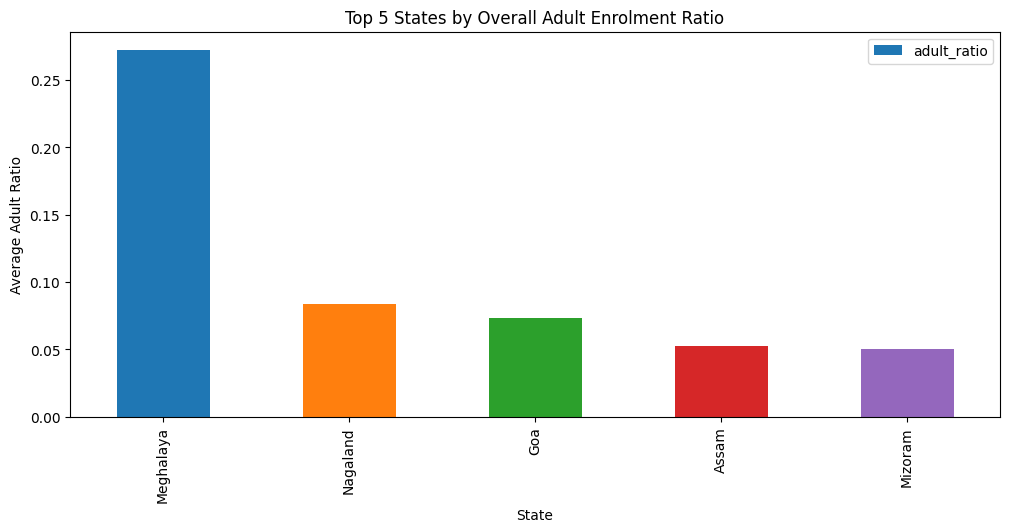

In [19]:
high_adult_ratio_states = df.groupby('state')['adult_ratio'].mean().reset_index().sort_values('adult_ratio',ascending = False).head(5)
print(high_adult_ratio_states.head(5))          ## Wrt entire population

high_adult_ratio_states.plot(
    x='state',
    y='adult_ratio',
    kind='bar',
    figsize=(12,5),
    color=plt.cm.tab10.colors
)

plt.xlabel("State")
plt.ylabel("Average Adult Ratio")
plt.title("Top 5 States by Overall Adult Enrolment Ratio")
plt.show()


## 4.2 DISTRICT-LEVEL RELATIVE DEVIATION

In [25]:
district_state_avg = (
    df.groupby(['state', 'district'])['total_enrolment']
    .sum()
    .reset_index()
)

district_state_avg['state_mean'] = (
    district_state_avg.groupby('state')['total_enrolment']
    .transform('mean')
)

district_state_avg['state_std'] = (
    district_state_avg.groupby('state')['total_enrolment']
    .transform('std')
)

district_state_avg['z_within_state'] = (
    (district_state_avg['total_enrolment'] - district_state_avg['state_mean']) /
    district_state_avg['state_std']
)

anomalies_district=district_state_avg[district_state_avg['z_within_state'] > 3]
anomalies_district=anomalies_district.sort_values('z_within_state',ascending = False)
anomalies_district['state_district'] = anomalies_district['district'] + "-" + anomalies_district['state']
anomalies_district



,state,district,total_enrolment,state_mean,state_std,z_within_state,state_district
379,Karnataka,Bengaluru,30980,3986.339286,5099.234853,5.293669,Bengaluru-Karnataka
797,Telangana,Hyderabad,25990,3132.714286,4842.964494,4.719689,Hyderabad-Telangana
554,Maharashtra,Thane,43688,6964.886792,8299.843735,4.424555,Thane-Maharashtra
679,Punjab,Ludhiana,17614,2740.928571,3564.440769,4.172624,Ludhiana-Punjab
271,Haryana,Faridabad,16155,3778.923077,3122.108402,3.964013,Faridabad-Haryana
382,Karnataka,Bengaluru Urban,23074,3986.339286,5099.234853,3.743240,Bengaluru Urban-Karnataka
261,Gujarat,Surat,25469,7013.725000,5533.249984,3.335341,Surat-Gujarat
986,West Bengal,Murshidabad,35911,6471.379310,8877.944014,3.316040,Murshidabad-West Bengal
857,Uttar Pradesh,Bahraich,39338,11445.269663,8463.428505,3.295677,Bahraich-Uttar Pradesh
718,Rajasthan,Jaipur,31146,8103.674419,7081.144132,3.254040,Jaipur-Rajasthan


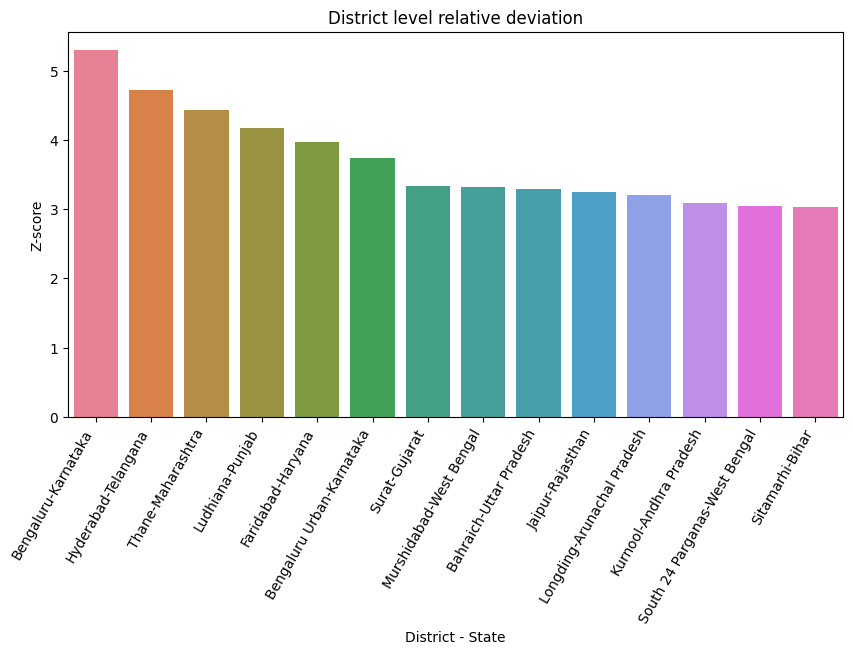

In [26]:
plt.figure(figsize = (10,5))
sns.barplot(data = anomalies_district,
            x ='state_district',
            y ='z_within_state',
            hue = 'state_district',
            legend = False)
plt.title("District level relative deviation")
plt.xticks(rotation=60, ha='right')
plt.xlabel("District - State")
plt.ylabel("Z-score")
plt.show()